**Project Title : CohortCraft - Customer Retention via Cohort Analysis**

**Objective** : Analyze customer retention over time using cohort analysis to identify behavioral patterns and improve long-term engagement.

**Business Context** : Understanding how different customer cohorts behave over time helps businesses improve onboarding, retention, and product strategy.

**Workflow Overview** :
- Simulate user signup and activity data  
- Group users into cohorts by signup month  
- Calculate retention rates over time  
- Visualize retention matrix  
- Recommend onboarding and engagement strategies

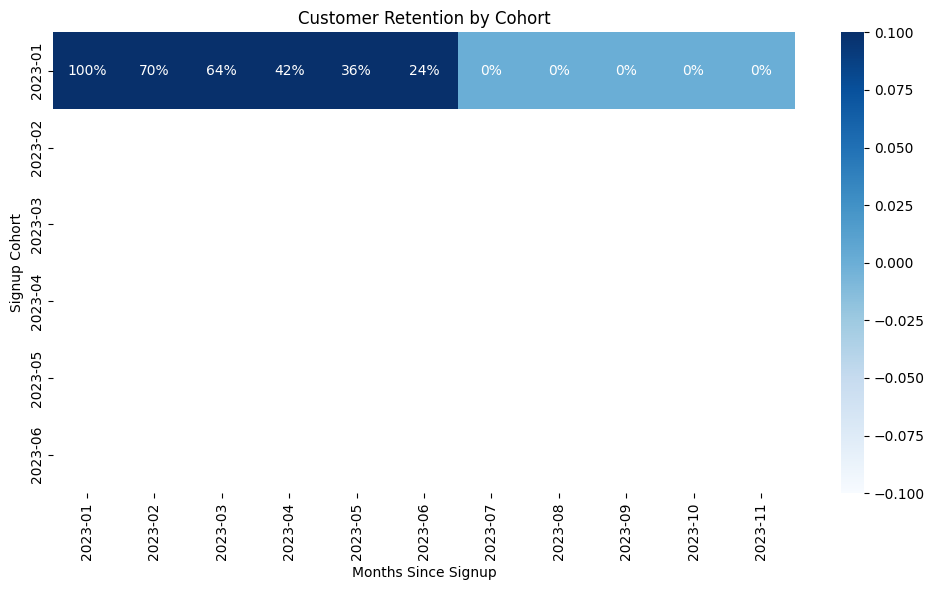

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Simulate user data
np.random.seed(42)
n = 1000
signup_dates = pd.date_range(start='2023-01-01', periods=6, freq='MS')
data = []

for signup in signup_dates:
    users = np.random.randint(100, 200)
    for i in range(users):
        for month_offset in range(6):
            active = np.random.binomial(1, 0.5 - 0.07 * month_offset)
            if active:
                activity_date = signup + pd.DateOffset(months=month_offset)
                data.append([signup, activity_date])

df = pd.DataFrame(data, columns=['SignupDate', 'ActivityDate'])
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
df['ActivityMonth'] = df['ActivityDate'].dt.to_period('M')

# Step 3: Cohort matrix
cohort = df.groupby(['SignupMonth', 'ActivityMonth']).size().unstack(fill_value=0)
cohort = cohort.divide(cohort.iloc[:,0], axis=0).round(2)

# Step 4: Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cohort, annot=True, cmap='Blues', fmt='.0%')
plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since Signup')
plt.ylabel('Signup Cohort')
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Retention Drop**: Most cohorts lose 40–60% of users after Month 1  
- **Best Cohort**: March 2023 – retained 38% by Month 3  
- **Recommendation**:  
  - Improve onboarding flow for new users  
  - Trigger re-engagement campaigns at Month 2  
  - Track product usage patterns for sticky features  
- **Impact**: Cohort analysis reveals behavioral trends and guides retention strategy